In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ned import VG_Modules_Model1, VG_Modules_Model2

In [3]:
tehran_index = pd.read_excel('../Data/Tehran_Indexes_Price_NoRegime.xlsx').set_index('date')

In [4]:
tehran_df_reg = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')

In [5]:
# tehran_df = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')

In [6]:
# tehran_index = pd.read_excel('../Data/Tehran_Indexes_Price_NoRegime.xlsx').set_index('date')

In [12]:
snp500_index = pd.read_excel('../Data/S&P500_Index.xlsx').set_index('Date')['Close*'].values

In [13]:
snp500_df = pd.read_excel('../Data/S&P500_Index_regimed.xlsx').set_index('Date')

In [14]:
ts_price_selected = snp500_index[-500:]
ts_df_selected = snp500_df[-500:]

# Forcasting Model One

## Usual Model One

In [15]:
VG1 = VG_Modules_Model1()
tehran_tedpix_price_forcasted_model1 = VG1.ts_forcast_model1(ts_price_selected)
errors_model1 = VG1.error_bars(ts_price_selected, tehran_tedpix_price_forcasted_model1)
errors_model1[1]

/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:22: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = np.array(adjacency_matrix(G).todense())


0.03451873542876556

## Based on 3 Regimed

In [16]:
tehran_tedpix_price_forcasted_model1_3Regimed = VG1.ts_forcast_3Regimed_model1(ts_price_selected, ts_df_selected)
errors_model1_3Regimed = VG1.error_bars(ts_price_selected, tehran_tedpix_price_forcasted_model1_3Regimed)
errors_model1_3Regimed[1]

/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:54: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = np.array(adjacency_matrix(G).todense())


0.03306959689048757

# Forcasting Model Two

In [21]:
VG2 = VG_Modules_Model2()
tehran_tedpix_price_forcasted_model2 = VG2.ts_forcast_model2_weighted(ts_price_selected)
errors_model2 = VG2.error_bars(ts_price_selected, tehran_tedpix_price_forcasted_model2)
errors_model2[1]

0.03417300021495113

## Based on 3 Regimed

In [22]:
tehran_tedpix_price_forcasted_model2 = VG2.ts_forcast_3Regimed_model2_weighted(ts_price_selected, ts_df_selected)
errors_model2 = VG2.error_bars(ts_price_selected, tehran_tedpix_price_forcasted_model2)
errors_model2[1]

0.03306959689048757

In [23]:
tehran_tedpix_price_forcasted_model2 = VG2.ts_forcast_3Regimed_weighted_compact(ts_price_selected, ts_df_selected)
errors_model2 = VG2.error_bars(ts_price_selected, tehran_tedpix_price_forcasted_model2)
errors_model2[1]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [20]:
ts_forcast_3Regimed_weighted_compact

NameError: name 'ts_forcast_3Regimed_weighted_compact' is not defined

# Forcasting Model Three

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.linalg.graphmatrix import adjacency_matrix
import math
from visibility_graph import visibility_graph

In [25]:
def ts_forcast(df , time_serie):
    G = visibility_graph(time_series)
    adj_matrix = np.array(adjacency_matrix(G).todense())
    E = G.number_of_edges()
    k = adj_matrix.sum(1)
    P = adj_matrix/k
    n = k.shape[0]
    s_srw = np.zeros((n,n))
    pi = np.diag(np.ones(n))
    for t in range(T):
        pi = P@pi
        s_srw += (k*pi+k.T*pi.T)/(2*E)
    if tp != 0:
        triup = np.triu(s_srw,k=-tp)
        triup[triup != 0] = 1
        s_srw = np.tril(s_srw,k=-1) * triup
        
    sum_s = s_srw.sum(axis=1)
    sum_s[sum_s == 0] = np.inf
    ws_m = (s_srw.T/sum_s).T
    ws = np.zeros((ws_m.shape[0], tp))

    srw = s_srw
    indx = []
    rg_3 = []
    ms_reg = []
    total_y_indexs = []
    total_y_srws = []
    tp = 50
    for k in range(len(srw)):
        total_y_indexs.append([])
        total_y_srws.append([])
        indx.append([])
        # indx[-1].append(0)
        rg_3.append([])
        rg_3[-1].append(df.iloc[k]['3_regime_index'])
        for i in range(tp):
            indx[-1].append(np.where(srw[k] == np.sort(srw[k])[::-1][:tp][i])[0][0])
            rg_3[-1].append(df.iloc[indx[-1][-1]]['3_regime_index'])

        if rg_3[k][0] != 2:
            same_reg = np.where(rg_3[k]==rg_3[k][0])[0]
            turn_points = np.where(np.array(rg_3[k])==2)[0]
            num_same_regime = len(same_reg)
            num_turn_ponits = len(turn_points)
            indx_same = np.array(indx[k])[list(same_reg[1:]-1)]
            indx_2 = np.array(indx[k])[list(turn_points-1)]
            total_y_indexs[-1].append(np.concatenate((indx_same,indx_2), axis=0))
            srw[k][indx_2] *= num_turn_ponits
            srw[k][indx_same] *= num_same_regime
            ssr = srw[k][total_y_indexs[-1]]


            total_y_srws[-1].append(ssr[0]/sum(ssr[0]))

        if rg_3[k][0] == 2:
            same_reg = np.where(rg_3[k]==rg_3[k][0])[0]
            other_points = np.where(np.array(rg_3[k])!=2)[0]
            num_same_regime = len(same_reg)
            num_turn_ponits = len(other_points)
            indx_same = np.array(indx[k])[list(same_reg[1:]-1)]
            indx_2 = np.array(indx[k])[list(other_points-1)]
            total_y_indexs[-1].append(np.concatenate((indx_same,indx_2), axis=0))

            srw[k][indx_2] *= num_turn_ponits
            srw[k][indx_same] *= num_same_regime 

            ssr = srw[k][total_y_indexs[-1]]
            # ssr_0 , ssr_1 = np.unique(ssr[0], return_index=True)
            # ssr = ssr_0[np.argsort(ssr_1)]
            # ssr = ssr[ssr!=0]
            # total_y_indexs = total_y_indexs[np.argsort(ssr_1)]

            total_y_srws[-1].append(ssr[0]/sum(ssr[0]))


    start_point = 31
    forcast_ts = np.zeros_like(time_serie)
    forcast_ts[:start_point] = time_serie[:start_point]
    for i in range(start_point-1,time_serie.shape[0]-1):
        y = time_serie[i]+(time_serie[i]-time_serie[total_y_indexs[i][0]])/(i-total_y_indexs[i][0])
        forcast_ts[i+1]=(total_y_srws[i]*y).sum()

    return forcast_ts

In [26]:
time_series = tehran_index[tehran_index.columns[0]][-500:]
T = 30
tp = 30

In [73]:
G = visibility_graph(ts_price_selected)
adj_matrix = np.array(adjacency_matrix(G).todense())
E = G.number_of_edges()
k = adj_matrix.sum(1)
P = adj_matrix/k
n = k.shape[0]
s_srw = np.zeros((n,n))
pi = np.diag(np.ones(n))
for t in range(T):
    pi = P@pi
    s_srw += (k*pi+k.T*pi.T)/(2*E)
if tp != 0:
    triup = np.triu(s_srw,k=-tp)
    triup[triup != 0] = 1
    s_srw = np.tril(s_srw,k=-1) * triup

sum_s = s_srw.sum(axis = 1)
sum_s[sum_s == 0] = np.inf
ws_m = (s_srw.T/sum_s).T
ws = np.zeros((ws_m.shape[0], tp))

/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_835/2362704917.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = np.array(adjacency_matrix(G).todense())


In [77]:
ws

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
df = tehran_df_reg

In [29]:
for k in range(len(srw)):
    total_y_indexs.append([])
    total_y_srws.append([])
    indx.append([])
    # indx[-1].append(0)
    rg_3.append([])
    rg_3[-1].append(df.iloc[k]['Ox_3'])
    for i in range(tp):
        indx[-1].append(np.where(srw[k] == np.sort(srw[k])[::-1][:tp][i])[0][0])
        rg_3[-1].append(df.iloc[indx[-1][-1]]['Ox_3'])
        
    if rg_3[k][0] != 2:
        same_reg = np.where(rg_3[k]==rg_3[k][0])[0]
        turn_points = np.where(np.array(rg_3[k])==2)[0]
        num_same_regime = len(same_reg)
        num_turn_ponits = len(turn_points)
        indx_same = np.array(indx[k])[list(same_reg[1:]-1)]
        indx_2 = np.array(indx[k])[list(turn_points-1)]
        total_y_indexs[-1].append(np.concatenate((indx_same,indx_2), axis=0))
        srw[k][indx_2] *= num_turn_ponits
        srw[k][indx_same] *= num_same_regime
        ssr = srw[k][total_y_indexs[-1]]


        total_y_srws[-1].append(ssr[0]/sum(ssr[0]))

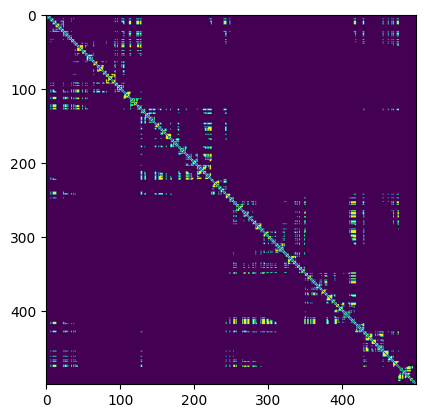

In [67]:
plt.imshow(adj_matrix)

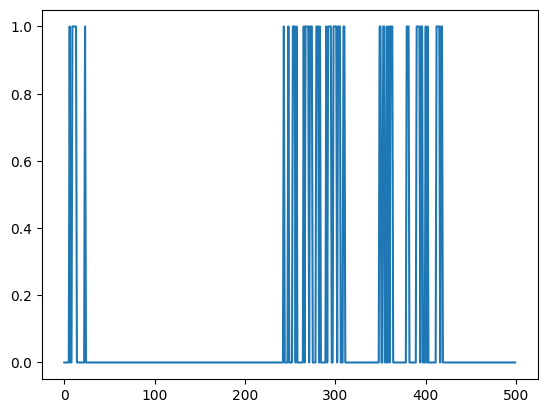

In [64]:
plt.plot(adj_matrix[416])

In [68]:
E

3073

In [69]:
k

array([ 3,  2,  6,  3,  3,  4, 44,  3,  3, 44, 41, 33, 34, 39,  6,  6,  5,
        8,  3,  3, 11,  3,  6, 52,  2, 29, 26, 26,  3, 32,  2,  4,  4,  2,
       37,  3,  3, 35,  2, 35,  2, 22, 27, 21, 21,  5,  7,  5,  8, 24,  4,
        3,  4, 21,  2, 21,  7,  3,  6,  5,  6,  4,  8,  2, 23,  8,  3,  4,
        9, 14,  8, 11,  9,  4,  6,  7, 12, 12,  7,  2,  4, 17,  7,  5, 11,
        6,  5,  4,  7,  8,  7,  4, 15, 41,  3,  3, 25,  5,  5,  7,  4,  4,
       29, 15, 37, 40,  8,  7,  5,  6,  6,  7, 20, 26, 35,  6,  6,  7,  3,
        9,  3,  4, 21, 28, 23, 26,  3, 25, 71, 43,  3,  4,  3, 27, 23,  4,
        4,  5,  3, 13,  7,  9,  9,  2, 10,  6, 11, 24, 22,  5,  4,  4, 22,
        9, 17, 25, 15, 17,  2,  4,  4,  6, 23,  6,  6,  5,  6,  5, 21, 12,
        7,  2, 10,  2,  5,  4,  8,  6, 16, 30, 12, 16,  3,  6,  5,  4,  7,
        2,  9, 23, 12, 17, 13,  2, 14,  2, 17,  6, 10,  5,  4,  4,  9,  6,
       26,  7, 12, 11,  9, 12,  3,  3, 14, 17, 21, 33, 31,  4, 27, 30, 12,
       40, 41, 38,  2, 10

In [71]:
P

array([[0.        , 0.5       , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [72]:
adj_matrix

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])